<a href="https://colab.research.google.com/github/dzulfqr/testing/blob/master/PYIM_Assgn_3_8_DzulfiqarNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👩‍💻 Is this a good software? 👨‍💻

Di dalam notebook ini, saya mencoba merangkum proses yang dilakukan dalam mengimplementasikan RNN dengan Tensorflow untuk membuat model klasifikasi teks, termasuk dataset preprocessing sebelum membuat model tersebut. Data yang digunakan merupakan salah satu dari Tensorflow Datasets, yaitu Amazon US Reviews dan yang diambil khusus untuk produk Software saja ‎‍💻

## Persiapan
Langkah ini dilakukan jika kita mengambil data langsung dari sumbernya yaitu TFDS (TensorFlow DataSet). Anda bisa skip langsung ke bagian "Import Data" untuk menggunakan ready to use data dalam bentuk csv. Pastikan sudah memiliki file tersebut.

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

# agar progress bar saat memperoleh dataset tidak perlu ditampilkan
tfds.disable_progress_bar()

Import `matplotlib` dan buat fungsi yang akan membantu dalam membuat/plot grafik:

In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

## Membuat input pipeline


Dataset review Amazon merupakan dataset yang sangat besar, kita hanya ambil bagian Video Game. Selain itu, berbeda dengan dataset IMDB, dataset ini belum dipisah antara training dan test-nya. Target atau label yang akan diprediksi *binary classification* — isinya adalah sentimen *positive* dan *negative*. Label ini pun belum dipisah dalam dataset. Karena alasan-alasan tersebut, dibutuhkan konfigurasi di bawah.

Download dataset-nya menggunakan [TFDS](https://www.tensorflow.org/datasets).


In [3]:
dataset, info = tfds.load('amazon_us_reviews/Software_v1_00', with_info=True,
                          as_supervised=False)

# hanya ada bagian 'train', bagian 'test' tidak ada
train_dataset = dataset['train']

# rincian kolom dalam dataset tersebut dengan jenis datanya TensorSpec
train_dataset.element_spec

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Software_v1_00/0.1.0.incompleteW50VDP/amazon_us_reviews-train.tfrecord
Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Software_v1_00/0.1.0. Subsequent calls will reuse this data.


{'data': {'customer_id': TensorSpec(shape=(), dtype=tf.string, name=None),
  'helpful_votes': TensorSpec(shape=(), dtype=tf.int32, name=None),
  'marketplace': TensorSpec(shape=(), dtype=tf.string, name=None),
  'product_category': TensorSpec(shape=(), dtype=tf.string, name=None),
  'product_id': TensorSpec(shape=(), dtype=tf.string, name=None),
  'product_parent': TensorSpec(shape=(), dtype=tf.string, name=None),
  'product_title': TensorSpec(shape=(), dtype=tf.string, name=None),
  'review_body': TensorSpec(shape=(), dtype=tf.string, name=None),
  'review_date': TensorSpec(shape=(), dtype=tf.string, name=None),
  'review_headline': TensorSpec(shape=(), dtype=tf.string, name=None),
  'review_id': TensorSpec(shape=(), dtype=tf.string, name=None),
  'star_rating': TensorSpec(shape=(), dtype=tf.int32, name=None),
  'total_votes': TensorSpec(shape=(), dtype=tf.int32, name=None),
  'verified_purchase': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'vine': TensorSpec(shape=(), dtype=tf

In [4]:
# load data sebagai dataframe untuk memeriksa isinya, dan mendefinisikan label
df = tfds.as_dataframe(dataset['train'], info)
df.head()

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'16092114',0,b'US',b'Software',b'B00K7DFZM8',b'463164798',b'Ultimate eBook Creator - eBook Creation Soft...,b'I looked at many similar products before pur...,b'2015-05-08',b'Love the product and the support!',b'R3ZF93NH4JW4A',5,3,1,1
1,b'41249792',0,b'US',b'Software',b'B0009R5KPY',b'893620404',b'Webroot Desktop Firewall/Spy Sweeper Bundle',b'This version of Webroot Desktop Firewall has...,b'2011-06-27',"b'Very simple older firewall, but has some pro...",b'R2R4VJ8I2AW452',3,0,1,1
2,b'49439957',0,b'US',b'Software',b'B004M39SU4',b'70948804',b'(2011 Version) Instant Immersion Chinese Lev...,"b'they compare them selves to fluenz, but it i...",b'2013-02-03',b'they compare them selves to fluenz',b'R3VBC4RGM7NBZN',2,2,0,1
3,b'15588846',8,b'US',b'Software',b'B007S0313I',b'921177771',b'Adobe Photoshop Extended CS6 Student and Tea...,b'I would love to give Photoshop 5 stars. CS6...,b'2012-11-23',b'Missing an important feature !!',b'R2Y1JR0BW16OX2',3,9,1,1
4,b'22541830',11,b'US',b'Software',b'B0000DG2N4',b'581479189',b'Sun StarOffice 7',"b""StarOffice 7 is a good office suite for the ...",b'2003-12-17',"b'Good product for the price it sells, but...'",b'R262IV4XVJ21Q8',4,12,1,1


In [5]:
# jumlah raw data
len(df)

341931

In [6]:
# mengambil hanya review 1-2 untuk negative label, dan 4-5 untuk positive label
df = df[df['data/star_rating'] != 3]
len(df)

311255

In [7]:
df['Sentiment'] = df['data/star_rating'].apply(lambda score: 'positive' if score > 3 else 'negative')
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})
df['short_review'] =df['data/review_body'].str.decode("utf-8")
df = df[["short_review", "Sentiment"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [8]:
# melihat data final
df.head()

,short_review,Sentiment
0,I looked at many similar products before purch...,1
2,"they compare them selves to fluenz, but it is ...",0
4,StarOffice 7 is a good office suite for the mo...,1
5,Good!!!!!!!,1
6,I just bought Britannica Puzzle Potpourri. It...,0


In [9]:
# menyimpan data final ke file csv
df.to_csv('processed_software.csv')

## Import data
Mulai dari bagian ini jika Anda ignin langsung menggunakan ready to use data dalam bentuk csv. Pastikan sudah memiliki file tersebut.


In [10]:
# import pandas as pd
# df = pd.read_csv('processed_software.csv')

In [11]:
df.head()

,short_review,Sentiment
0,I looked at many similar products before purch...,1
2,"they compare them selves to fluenz, but it is ...",0
4,StarOffice 7 is a good office suite for the mo...,1
5,Good!!!!!!!,1
6,I just bought Britannica Puzzle Potpourri. It...,0


In [12]:
df['Sentiment'].unique()

array([1, 0])

## Pemisahan data train & test
Dalam kode ini dilakukan pemisahan data ke bagian train dan test dengan komposisi 80% dan 20% secara berturut-turut.

In [13]:
# data masih berupa pandas dataframe
df.reset_index()
benchmark = int(0.8 * len(df))
train_df = df.iloc[:benchmark, :]
test_df = df.iloc[benchmark:, :]

In [14]:
# jumlah data yang sudah dipisah
len(train_df), len(test_df)

(249004, 62251)

In [15]:
# mendefinisikan variabel untuk x_train dan y_train secara berturut-turut
reviews_train = train_df['short_review'].values.tolist()
labels_train = train_df['Sentiment'].tolist()

In [16]:
# mendefinisikan variabel untuk x_test dan y_test secara berturut-turut
reviews_test = test_df['short_review'].values.tolist()
labels_test = test_df['Sentiment'].tolist()

In [17]:
# berikut contoh salah satu x_test
reviews_test[90]

'As a web designer/developer this package has everything you need to get going and/or update your older software. Photoshop CS2 is vastly superior to its predecessors in terms of all the new offerings. There are products in the package that are totally useless (I mean come on - what self-respecting web designer uses GoLive?), but it was far less expensive to buy the bundle than individual products.'

Selanjutnya, convert dataset yang semula masih dalam bentuk pandas dataframe, menjadi dataset tensorflow. Lakukan pula shuffle dan pembuatan batches untuk processing nantinya. Tentukan nilai buffer size dan juga batch size nya. Autotune pun dilakukan di akhir untuk train dataset maupun test dataset.

In [18]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((reviews_train, labels_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [20]:
test_dataset = tf.data.Dataset.from_tensor_slices((reviews_test, labels_test)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Jenis data dalam dataset: string untuk reviews nya, sedangkan integer untuk labels nya.

In [21]:
train_dataset

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int32)>

In [22]:
test_dataset

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int32)>

Selanjutnya menampilkan pasangan `(text, label)` dari dataset yang sudah di-shuffle dan dibuat batches:

In [23]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'The game didint work and could not be loaded into the computer'
 b"Being a very smart user of computers, i might have had more luck then the other people.<br />This worked fine for me with windows XP.<br />It has a good E-mail protection that has protected me numerous times. It's firewall is very logical with not a lot of settings to edit. Also the anti-virus works very good, and protects against web based viruses.<br />Best thing about this is the fact that you can set it to auto-update. It will download new virus definitions without even bothering you, might slow down your internet though.<br />i got this with rebates that brought it down to like 5$, and this is well worth the money.<br />Only problem is the &quot;program&quot; controle. It does try to limit the access of a lot of programs, and i have got it to where it accepts everything execpt for my AIM start-up. So instead i have to manually click the AIM icon.<br />Also, there are prompts where it asks you if you want

## Membuat encoder untuk text

Teks mentah yang dimuat oleh `tfds` perlu diproses sebelum dapat digunakan dalam model. Cara paling sederhana untuk memproses teks untuk training adalah menggunakan layer `experimental.preprocessing.TextVectorization`. Layer ini memiliki banyak kemampuan, untuk saat ini saya masih tetap menggunakan default.

Buat layer, dan teruskan teks dataset yang dilakukan training ke metode `.adapt` yang dimiliki layer:

In [24]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

Metode `.adapt` mengatur 'vocabulary' dari layer. Berikut adalah 20 token pertama. Setelah padding dan didefinisikan token yang tidak diketahui (UNK), mereka diurutkan berdasarkan seberapa sering kemunculannya:

In [25]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'to', 'i', 'and', 'a', 'it', 'of', 'is', 'for',
       'this', 'you', 'that', 'in', 'with', 'my', 'have', 'on', 'br'],
      dtype='<U13')

Setelah vocabulary diatur, layer dapat encode teks ke dalam indeks. Tensor indeks 0-padded ke sequence terpanjang dalam batch (kecuali jika Anda menetapkan `output_sequence_length`):

In [26]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  2, 104,   1, ...,   0,   0,   0],
       [245,   6,  43, ...,   0,   0,   0],
       [  4, 340, 145, ...,   0,   0,   0]])

In [27]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'The game didint work and could not be loaded into the computer'
Round-trip:  the game [UNK] work and could not be loaded into the computer                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Original:  b"Being a very smart user of computers, i might have had more luck then the other people.<br />This worked fine for me with windows XP.<br />It has a good E-mail protection that has protected me numerous times. It's firewall is very logical with not a lot of settings to edit. Also the anti-virus works very good, and protects against web based viruses.<br />Best thing about this is the fact

## Membuat model pertama

1. Model ini dapat dibuat sebagai `tf.keras.Sequential`.

2. Layer pertama adalah `encoder`, yang mengubah teks menjadi urutan indeks token.

3. Setelah encoder adalah layer embedding. Layer embedding menyimpan satu vektor per kata. Ketika dipanggil, layer ini mengubah urutan indeks kata menjadi urutan vektor. Vektor ini dapat di-train. Setelah training (pada data yang cukup), kata-kata dengan arti yang sama sering kali memiliki vektor yang serupa.

4. Sebuah recurrent neural network (RNN) memproses input 'sequence' dengan iterasi melalui elemen. RNN melewatkan output dari satu timestep ke input mereka pada timestep berikutnya.

5. Setelah RNN mengubah sequence menjadi satu vektor, kedua `layers.Dense` melakukan beberapa pemrosesan akhir, dan mengubah dari representasi vektor ini menjadi single logit sebagai keluaran klasifikasi.

In [28]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Gunakan masking untuk handling panjang sequence variable
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

Catatan: bahwa model sekuensial Keras digunakan di sini karena semua layer dalam model hanya memiliki input tunggal dan menghasilkan output tunggal.

Semua layer setelah `Embedding` support masking:

In [29]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


Untuk memastikan bahwa ini berfungsi seperti yang diharapkan, evaluasi sebuah kalimat dua kali. Pertama, sendiri sehingga tidak ada padding yang dilakukan masking:

In [30]:
# predict on a sample text without padding.

sample_text = ('This software was very good and in excellent condition. It is definitely what I wanted.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[-0.00662531]


Sekarang, evaluasi lagi dalam batch dengan kalimat yang lebih panjang. Hasilnya seharusnya sama:

In [31]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[-0.00662531]


Kompilasi model Keras untuk mengonfigurasi proses training:

In [32]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## Train model yang sudah dibangun

In [33]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
3891/3891 [==============================] - 430s 109ms/step - loss: 0.3217 - accuracy: 0.8464 - val_loss: 0.2739 - val_accuracy: 0.8865
Epoch 2/10
3891/3891 [==============================] - 387s 99ms/step - loss: 0.2615 - accuracy: 0.8866 - val_loss: 0.2638 - val_accuracy: 0.8901
Epoch 3/10
3891/3891 [==============================] - 397s 102ms/step - loss: 0.2520 - accuracy: 0.8902 - val_loss: 0.2598 - val_accuracy: 0.8896
Epoch 4/10
3891/3891 [==============================] - 447s 115ms/step - loss: 0.2446 - accuracy: 0.8931 - val_loss: 0.2555 - val_accuracy: 0.8948
Epoch 5/10
3891/3891 [==============================] - 424s 109ms/step - loss: 0.2395 - accuracy: 0.8955 - val_loss: 0.2644 - val_accuracy: 0.8958
Epoch 6/10
3891/3891 [==============================] - 398s 102ms/step - loss: 0.2319 - accuracy: 0.8984 - val_loss: 0.2441 - val_accuracy: 0.8922
Epoch 7/10
3891/3891 [==============================] - 393s 101ms/step - loss: 0.2226 - accuracy: 0.9034 - val_l

In [34]:
# evaluasi nilai loss dan accuracy
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

973/973 [==============================] - 47s 49ms/step - loss: 0.2145 - accuracy: 0.9068
Test Loss: 0.21448001265525818
Test Accuracy: 0.9068127274513245


(0.0, 0.32776669040322304)

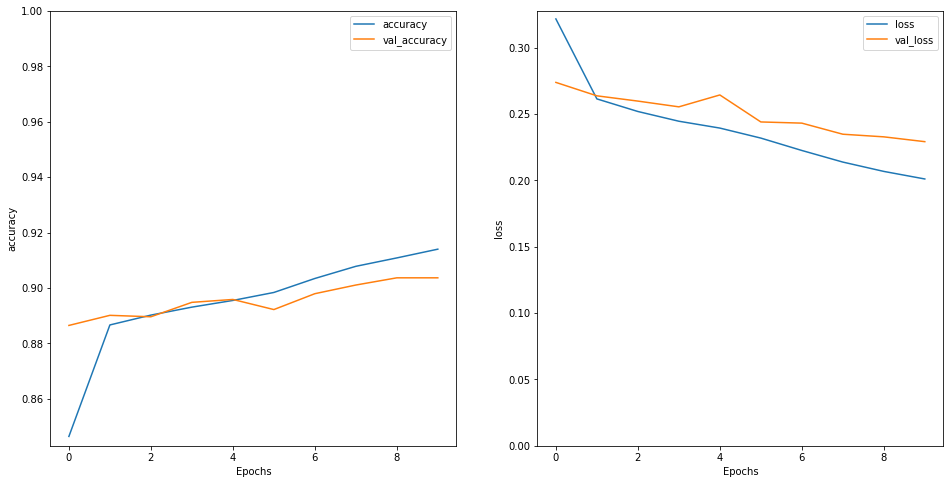

In [35]:
# visualisasi nilai loss dan accuracy dalam setiap epochs
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

Jalankan prediksi pada kalimat baru:

Jika prediksinya >= 0,0, maka positif jika tidak maka negatif.

In [36]:
sample_text = ('This software was very good and in excellent condition. It is definitely what I wanted.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[8.909942]]


In [37]:
# !mkdir -p saved_model
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


## "Stack" dua atau lebih layer LSTM

Layer recurrent Keras memiliki dua mode yang tersedia yang dikendalikan oleh argumen konstruktor `return_sequences`.

Hal yang menarik dari penggunaan `RNN` dengan `return_sequences=True` adalah outputnya masih memiliki 3 sumbu, seperti input, sehingga dapat diteruskan ke layer RNN lain, seperti ini:

In [38]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [39]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [40]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
3891/3891 [==============================] - 741s 186ms/step - loss: 0.3269 - accuracy: 0.8384 - val_loss: 0.2802 - val_accuracy: 0.8839
Epoch 2/10
3891/3891 [==============================] - 729s 187ms/step - loss: 0.2692 - accuracy: 0.8845 - val_loss: 0.2653 - val_accuracy: 0.8906
Epoch 3/10
3891/3891 [==============================] - 711s 183ms/step - loss: 0.2591 - accuracy: 0.8881 - val_loss: 0.2637 - val_accuracy: 0.8823
Epoch 4/10
3891/3891 [==============================] - 755s 194ms/step - loss: 0.2514 - accuracy: 0.8909 - val_loss: 0.2642 - val_accuracy: 0.8969
Epoch 5/10
3891/3891 [==============================] - 691s 178ms/step - loss: 0.2433 - accuracy: 0.8950 - val_loss: 0.2513 - val_accuracy: 0.8891
Epoch 6/10
3891/3891 [==============================] - 810s 208ms/step - loss: 0.2330 - accuracy: 0.8999 - val_loss: 0.2497 - val_accuracy: 0.8990
Epoch 7/10
3891/3891 [==============================] - 799s 205ms/step - loss: 0.2231 - accuracy: 0.9054 - val_

In [41]:
# evaluasi nilai loss dan accuracy
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

973/973 [==============================] - 81s 83ms/step - loss: 0.2084 - accuracy: 0.9127
Test Loss: 0.20843426883220673
Test Accuracy: 0.9127243161201477


In [42]:
# prediksi pada teks sampel tanpa padding.

sample_text = ('This software was very good and in excellent condition. It is definitely what I wanted.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[7.158706]]


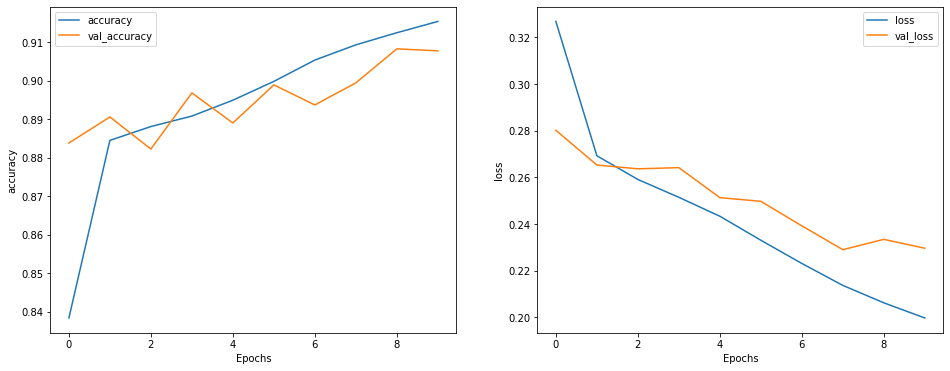

In [43]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [44]:
model.save('my_model1')

INFO:tensorflow:Assets written to: my_model1/assets


INFO:tensorflow:Assets written to: my_model1/assets
